In [1]:
# Install Dependencies 
import datetime as dt
from pandas_datareader import data as web
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
plt.style.use('bmh')

In [40]:
# store data in data frame 
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 7, 1)
df = web.DataReader('ZM','yahoo',start,end)

print('Data Sample')
df.head(5) # data sample

Data Sample


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,69.235001,68.019997,68.800003,68.720001,1315500,68.720001
2020-01-03,68.680000,67.099998,67.620003,67.279999,1127900,67.279999
2020-01-06,70.495003,65.811996,66.629997,70.320000,3151600,70.320000
2020-01-07,72.838997,69.370003,70.290001,71.900002,6985400,71.900002
2020-01-08,73.290001,71.029999,71.809998,72.550003,2482300,72.550003


In [41]:
# number of trading days in the dataset 
df.shape

(126, 6)

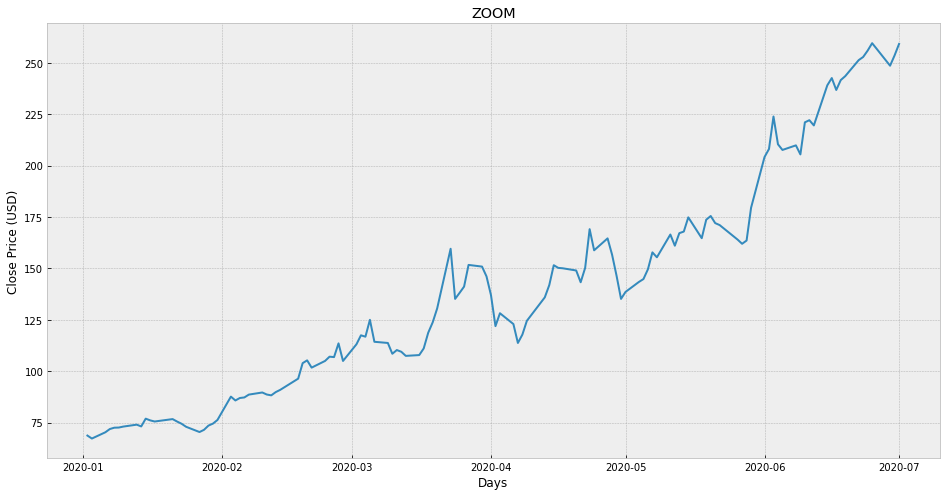

In [42]:
# Visualize the close price data 
plt.figure(figsize=(16,8))
plt.title('ZOOM')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.show()

In [16]:
# Get the close price 
df = df[['Close']]
df.tail(2)

,Close
Date,
2020-06-30,253.539993
2020-07-01,259.130005


In [43]:
# predict price in 'x' days 
future_days = 30

# create new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4) # data sample 

,High,Low,Open,Close,Volume,Adj Close,Prediction
Date,,,,,,,
2020-06-26,261.619995,250.360001,260.519989,256.799988,17142900,256.799988,NaN
2020-06-29,255.899994,243.589996,254.970001,248.559998,8436400,248.559998,NaN
2020-06-30,256.829987,248.350006,249.869995,253.539993,6305500,253.539993,NaN
2020-07-01,261.000000,247.210007,251.350006,259.130005,6803300,259.130005,NaN


In [44]:
# Create the feature data set (x) and convert it to a numpy array, then remove the last 'x' row/days 
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[6.92350006e+01 6.80199966e+01 6.88000031e+01 6.87200012e+01
  1.31550000e+06 6.87200012e+01]
 [6.86800003e+01 6.70999985e+01 6.76200027e+01 6.72799988e+01
  1.12790000e+06 6.72799988e+01]
 [7.04950027e+01 6.58119965e+01 6.66299973e+01 7.03199997e+01
  3.15160000e+06 7.03199997e+01]
 [7.28389969e+01 6.93700027e+01 7.02900009e+01 7.19000015e+01
  6.98540000e+06 7.19000015e+01]
 [7.32900009e+01 7.10299988e+01 7.18099976e+01 7.25500031e+01
  2.48230000e+06 7.25500031e+01]
 [7.40000000e+01 7.13499985e+01 7.39899979e+01 7.26200027e+01
  2.77200000e+06 7.26200027e+01]
 [7.38000031e+01 7.22500000e+01 7.30800018e+01 7.30899963e+01
  1.65510000e+06 7.30899963e+01]
 [7.55800018e+01 7.38000031e+01 7.38899994e+01 7.40299988e+01
  3.34710000e+06 7.40299988e+01]
 [7.51149979e+01 7.22600021e+01 7.43199997e+01 7.31600037e+01
  1.90950000e+06 7.31600037e+01]
 [7.77799988e+01 7.31999969e+01 7.32799988e+01 7.69400024e+01
  3.96350000e+06 7.69400024e+01]
 [7.87900009e+01 7.51100006e+01 7.80000000e+01 7.6

In [45]:
# Create the target data set (y) and convert it to numpy array then get all target values except the last 'n' rows 
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[ 90.94999695  96.38999939 103.93000031 105.29000092 101.76000214
 105.01000214 107.08000183 106.87999725 113.55000305 105.
 113.11000061 117.47000122 116.80000305 125.         114.31999969
 113.75       108.48999786 110.30000305 109.47000122 107.47000122
 107.86000061 111.09999847 118.70999908 123.76999664 130.55000305
 159.55999756 135.17999268 138.11000061 141.1499939  151.69999695
 150.88000488 146.11999512 137.         121.93000031 128.19999695
 122.94000244 113.75       117.80999756 124.51000214 135.91999817
 141.88999939 151.55999756 150.25999451 150.05999756 148.99000549
 143.27000427 150.25       169.08999634 158.80000305 164.6000061
 156.72000122 146.47999573 135.16999817 138.55999756 143.44000244
 144.82000732 149.58999634 157.80000305 155.3999939  166.47999573
 161.03999329 167.13999939 167.91000366 174.83000183 164.69000244
 173.67999268 175.47999573 172.02999878 171.05999756 164.
 161.97000122 163.55000305 179.47999573 204.1499939  208.08000183
 223.86999512 210.3500061  

In [47]:
# Split the dataset into 75% training, 25% testing 
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)


In [49]:
# Create the model - decision tree regressor model 
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [50]:
# get the last 'x' rows of the future dataset 
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[1.18440002e+02 1.09570999e+02 1.18004997e+02 1.13750000e+02
  2.01662000e+07 1.13750000e+02]
 [1.25877998e+02 1.12500000e+02 1.15019997e+02 1.17809998e+02
  2.62433000e+07 1.17809998e+02]
 [1.25500000e+02 1.14000000e+02 1.17800003e+02 1.24510002e+02
  1.55130000e+07 1.24510002e+02]
 [1.36860001e+02 1.25603996e+02 1.27000000e+02 1.35919998e+02
  1.54117000e+07 1.35919998e+02]
 [1.45199997e+02 1.39009995e+02 1.41070007e+02 1.41889999e+02
  1.16799000e+07 1.41889999e+02]
 [1.52570007e+02 1.40000000e+02 1.41710007e+02 1.51559998e+02
  1.41933000e+07 1.51559998e+02]
 [1.54250000e+02 1.46800003e+02 1.49919998e+02 1.50259995e+02
  1.51382000e+07 1.50259995e+02]
 [1.53789001e+02 1.44029999e+02 1.47910004e+02 1.50059998e+02
  1.13284000e+07 1.50059998e+02]
 [1.55000000e+02 1.48253998e+02 1.53300003e+02 1.48990005e+02
  1.12187000e+07 1.48990005e+02]
 [1.54750000e+02 1.38360001e+02 1.51419998e+02 1.43270004e+02
  9.70910000e+06 1.43270004e+02]
 [1.52279999e+02 1.45100006e+02 1.47100006e+02 1.5

In [51]:
# show the model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear reg prediction 
lr_prediction  = lr.predict(x_future)
print(lr_prediction)

[148.99000549 173.67999268 171.05999756 143.44000244 161.97000122
 163.55000305 179.47999573 204.1499939  208.08000183 223.86999512
 241.57000732 207.6000061  205.42999268 205.42999268 252.80999756
 222.07000732 219.52000427 239.02000427 242.55999756 241.57000732
 241.57000732 243.47999573 251.27000427 252.80999756 255.8999939
 252.80999756 256.79998779 248.55999756 253.53999329 248.55999756]

[156.49148476 133.33430213 162.87230393 175.94057514 199.52827394
 198.33219009 208.61713977 207.59879258 214.07546312 197.73624653
 214.51073599 208.32295561 185.33395514 211.81164495 222.83987328
 200.0426403  182.15458774 189.25232841 205.01721931 207.01073447
 214.34506907 219.05851612 227.89985629 229.21889126 237.64382585
 228.7401859  246.20653977 243.70005836 233.16833404 246.33322153]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


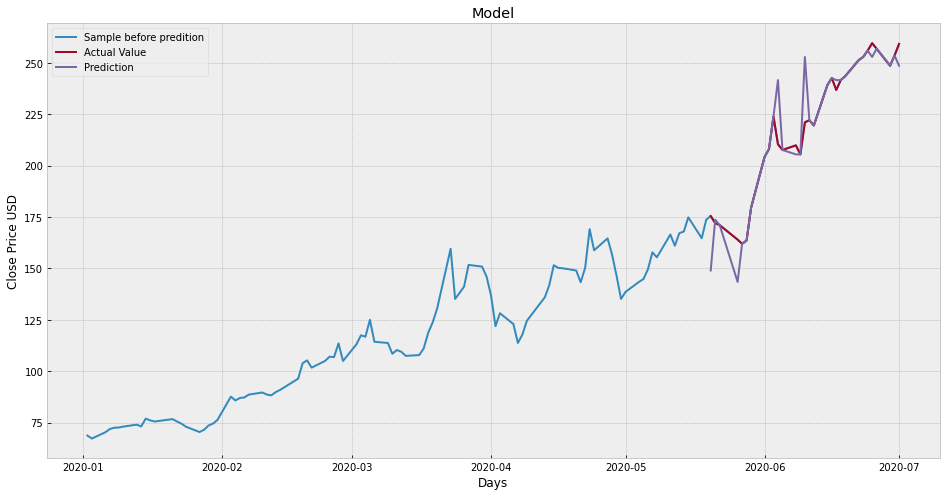

In [55]:
# Visualize the Data 

predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Sample before predition', 'Actual Value', 'Prediction'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


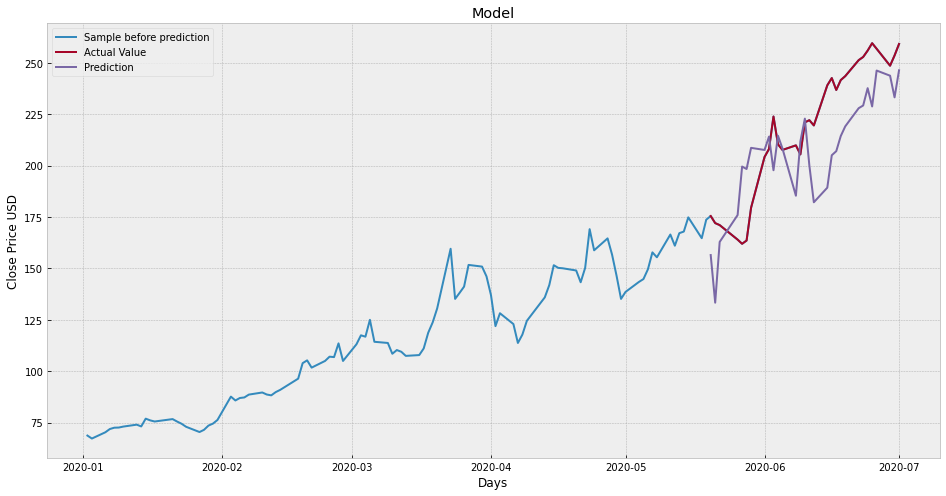

In [56]:
# Data Visuals

predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Sample before prediction', 'Actual Value', 'Prediction'])